# Simulating Superfluid Dark Matter (DM) with PyAutoLens

Task: Modify and/or use the already existing functionality of PyAutoLens to simulate strong lensing from superfluid dark matter. Specifically, you will need to simulate the effects of lensing from a linear mass density - imagine this being a string of mass on galactic scales.


The strategy is to create a 2D grid, source galaxy, lens galaxy, than finally creating the simulator and plotting the simulated
picture

## Importing required libraries

In [38]:
import autolens as al
import autolens.plot as aplt

## Creating 2D Grid 

A two-dimensional grids of size (50,50) Cartesian coordinates are used 

In [25]:
grid = al.Grid2D.uniform(
    shape_native=(120, 120),
    pixel_scales=0.1,  
)

## Creating the Source Galaxy

The source galaxy has an Elliptical Sercis light profile

In [26]:
source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        elliptical_comps=(0.2, 0.3),
        intensity=1.0,
        effective_radius=2.0,
        sersic_index=4.0,
    ),
    disk=al.lp.EllipticalSersic(
        centre=(0.3, 0.2),
        elliptical_comps=(0.1, 0.0),
        intensity=0.1,
        effective_radius=0.5,
        sersic_index=1.0,
    ),
)

The source galaxy will look like the following figure:

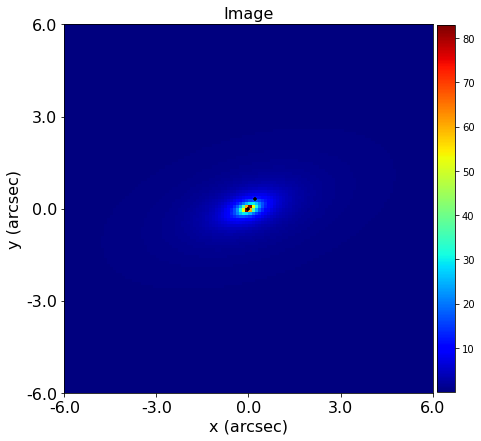

In [27]:
tracer = al.Tracer.from_galaxies(galaxies=[source_galaxy])
plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
plotter.figures(image=True)

## Creating the Lens Galaxy

The lens galaxy's light is modeled parametrically as an EllipticalSersic.

The lens galaxy's light matter mass distribution is fitted with the EllipticalSersic of the LightProfile, where it is converted to a stellar mass distribution via a constant mass-to-light ratio.

The lens galaxy's dark matter mass distribution is modeled as a SphericalNFW

In [28]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    bulge=al.lmp.EllipticalSersic(
        centre=(0.0, 0.0),
        elliptical_comps=(0.0, 0.05),
        intensity=0.5,
        effective_radius=0.3,
        sersic_index=3.5,
        mass_to_light_ratio=0.6,
    ),
    disk=al.lmp.EllipticalExponential(
        centre=(0.0, 0.0),
        elliptical_comps=(0.0, 0.1),
        intensity=1.0,
        effective_radius=2.0,
        mass_to_light_ratio=0.2,
    ),
    dark=al.mp.SphericalNFW(centre=(0.0, 0.0), kappa_s=0.08, scale_radius=30.0),
)

The following figure defines the plotting of the lens galaxy

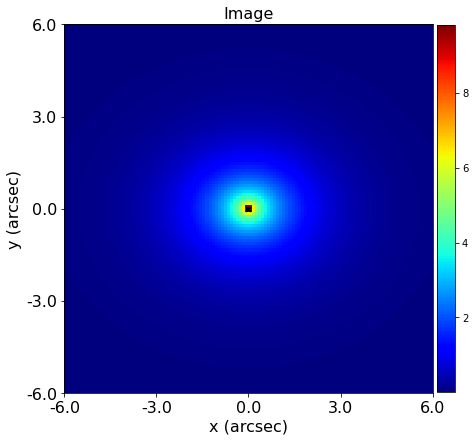

In [29]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy])
plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
plotter.figures(image=True)

## The Tracer

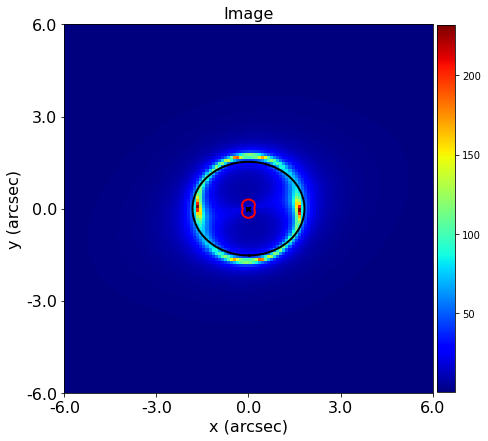

In [30]:
tracer = al.Tracer.from_galaxies(galaxies=[source_galaxy, lens_galaxy])
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

## The Simulation

Simulating strong lens images uses a SimulatorImaging object, which models the process that an instrument like the telescope's optic.

In [32]:
psf = al.Kernel2D.from_gaussian(
    shape_native=(11, 11), sigma=0.1, pixel_scales=grid.pixel_scales
)

simulator = al.SimulatorImaging(
    exposure_time=300.0,
    background_sky_level=1.0,
    psf=psf,
    add_poisson_noise=True,
)

And finally, the last step in our task is to plot the simulated figure

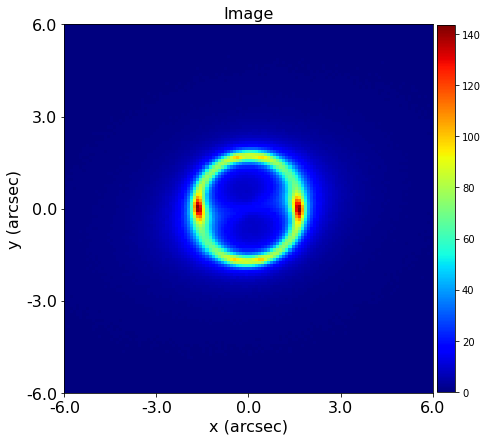

In [34]:
imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

In the next step, im creating an imaging dataset which consists of an image, noise-map and 
Point Spread Function (PSF) 

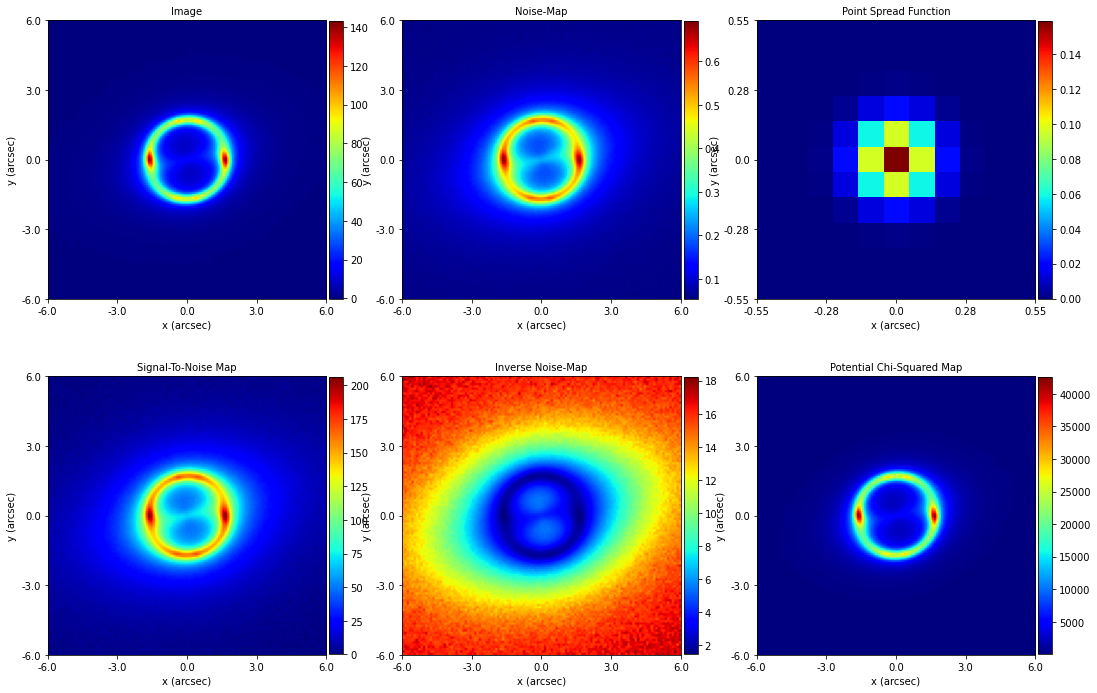

In [37]:
imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.subplot_imaging()